Aqui está um exemplo de como funciona um Baggin (Bootstrap Aggregating)

In [18]:
# Importando bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Carregando os dados de pinguins do Seaborn
penguins = sns.load_dataset("penguins")

# Removendo linhas com valores ausentes
penguins.dropna(inplace=True)

# Selecionando características (X) e rótulos (y)
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo três modelos base diferentes
model1 = RandomForestClassifier(random_state=42)  # Random Forest
model2 = KNeighborsClassifier()  # K-Nearest Neighbors
model3 = GradientBoostingClassifier(random_state=42)  # Gradient Boosting

# Treinando os modelos base
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Fazendo previsões com os modelos base
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# Avaliando o desempenho dos modelos base
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)

# Imprimindo a acurácia de cada modelo base
print(f'Acurácia do modelo Bagging com Random Forest: {accuracy1}')
print(f'Acurácia do modelo Bagging com K-Nearest Neighbors: {accuracy2}')
print(f'Acurácia do modelo Bagging com Gradient Boosting: {accuracy3}')


Acurácia do modelo Bagging com Random Forest: 1.0
Acurácia do modelo Bagging com K-Nearest Neighbors: 0.8208955223880597
Acurácia do modelo Bagging com Gradient Boosting: 1.0


Média dos resultados

In [19]:
# Calculando e imprimindo a acurácia média dos modelos
acuracia_media = (accuracy1 + accuracy2 + accuracy3) / 3
print(f'Acurácia média dos modelos: {acuracia_media}')

Acurácia média dos modelos: 0.9402985074626865


Plotando um gráfico básico para melhor visualização dos valores

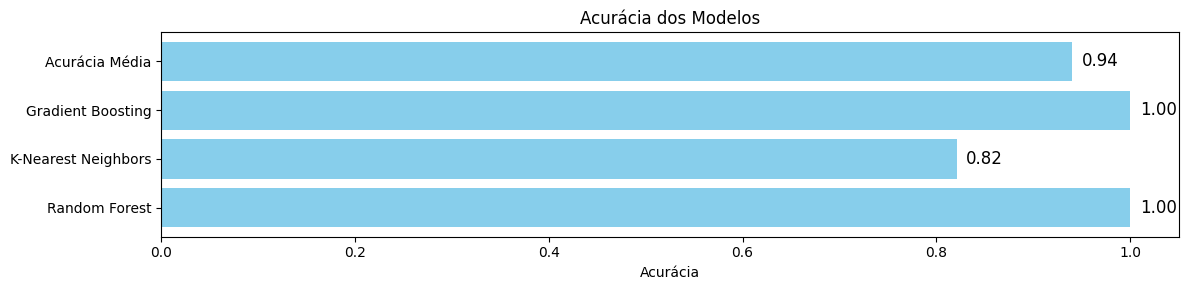

In [20]:
# Lista de acurácias dos modelos individuais e da acurácia média
accuracies = [accuracy1, accuracy2, accuracy3, acuracia_media]
models = ['Random Forest', 'K-Nearest Neighbors', 'Gradient Boosting', 'Acurácia Média']

# Criando um gráfico de barras simples
plt.figure(figsize=(12, 3))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Acurácia')
plt.title('Acurácia dos Modelos')

# Adicionando os valores de acurácia nas barras
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f'{acc:.2f}', va='center', fontsize=12)

plt.tight_layout()

# Exibindo o gráfico
plt.show()
